Wczytanie danych, wstępna analiza i czyszczenie danych

In [19]:
import pandas as pd

df = pd.read_csv('apartments_pl_2024_04.csv')
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,312f2788e54076b94f950baaeced3e54,szczecin,blockOfFlats,91.00,4.0,2.0,4.0,1932.0,53.465463,14.593251,...,0.182,condominium,brick,premium,no,no,no,no,yes,512000
1,23d558163bb1c7863c73485048e50858,szczecin,NaN,53.80,2.0,5.0,5.0,NaN,53.429429,14.554642,...,0.073,cooperative,NaN,NaN,no,no,yes,no,no,400000
2,cb5a5f936e4486afd41637860100b033,szczecin,tenement,130.00,4.0,1.0,3.0,1930.0,53.429368,14.552341,...,0.114,condominium,brick,low,no,yes,no,no,yes,975000
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,...,0.304,condominium,brick,NaN,no,yes,no,no,yes,599000
4,6d947e9a6521b8e608d3fcd6ff2f089a,szczecin,blockOfFlats,80.00,3.0,1.0,2.0,2017.0,53.495272,14.590178,...,0.340,condominium,brick,premium,yes,yes,no,yes,no,999999


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19259 entries, 0 to 19258
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19259 non-null  object 
 1   city                  19259 non-null  object 
 2   type                  15262 non-null  object 
 3   squareMeters          19259 non-null  float64
 4   rooms                 19259 non-null  float64
 5   floor                 15900 non-null  float64
 6   floorCount            19058 non-null  float64
 7   buildYear             16185 non-null  float64
 8   latitude              19259 non-null  float64
 9   longitude             19259 non-null  float64
 10  centreDistance        19259 non-null  float64
 11  poiCount              19259 non-null  float64
 12  schoolDistance        19250 non-null  float64
 13  clinicDistance        19203 non-null  float64
 14  postOfficeDistance    19240 non-null  float64
 15  kindergartenDistanc

In [21]:
df.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,19259.000000,19259.000000,15900.000000,19058.000000,16185.000000,19259.000000,19259.000000,19259.000000,19259.000000,19250.000000,19203.000000,19240.000000,19246.00000,19221.000000,18789.000000,19240.000000,1.925900e+04
mean,57.796552,2.646139,3.378805,5.408857,1987.163052,51.980667,19.453912,4.376359,20.589075,0.404715,0.960819,0.507286,0.35614,0.333907,1.454273,0.346485,8.229717e+05
std,20.973204,0.901742,2.555891,3.356377,33.153840,1.314286,1.770084,2.793476,24.168408,0.438833,0.869970,0.475530,0.41836,0.437099,1.110875,0.425770,4.351128e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979000,14.447100,0.010000,0.000000,0.005000,0.004000,0.004000,0.00100,0.001000,0.004000,0.001000,1.690000e+05
25%,43.500000,2.000000,2.000000,3.000000,1969.000000,51.101951,18.530545,2.060000,7.000000,0.177000,0.354000,0.238000,0.15400,0.110000,0.580000,0.143000,5.499990e+05
50%,53.840000,3.000000,3.000000,4.000000,1997.000000,52.190710,19.903870,4.040000,14.000000,0.291000,0.674000,0.391000,0.25800,0.226000,1.121000,0.239000,7.200000e+05
75%,67.065000,3.000000,4.000000,7.000000,2016.000000,52.386000,20.985098,6.180000,24.000000,0.465000,1.233000,0.617000,0.41200,0.404000,2.073000,0.404000,9.700000e+05
max,150.000000,6.000000,29.000000,29.000000,2024.000000,54.580750,23.198950,16.540000,211.000000,4.867000,4.999000,4.801000,4.96000,4.928000,5.000000,4.802000,3.149000e+06


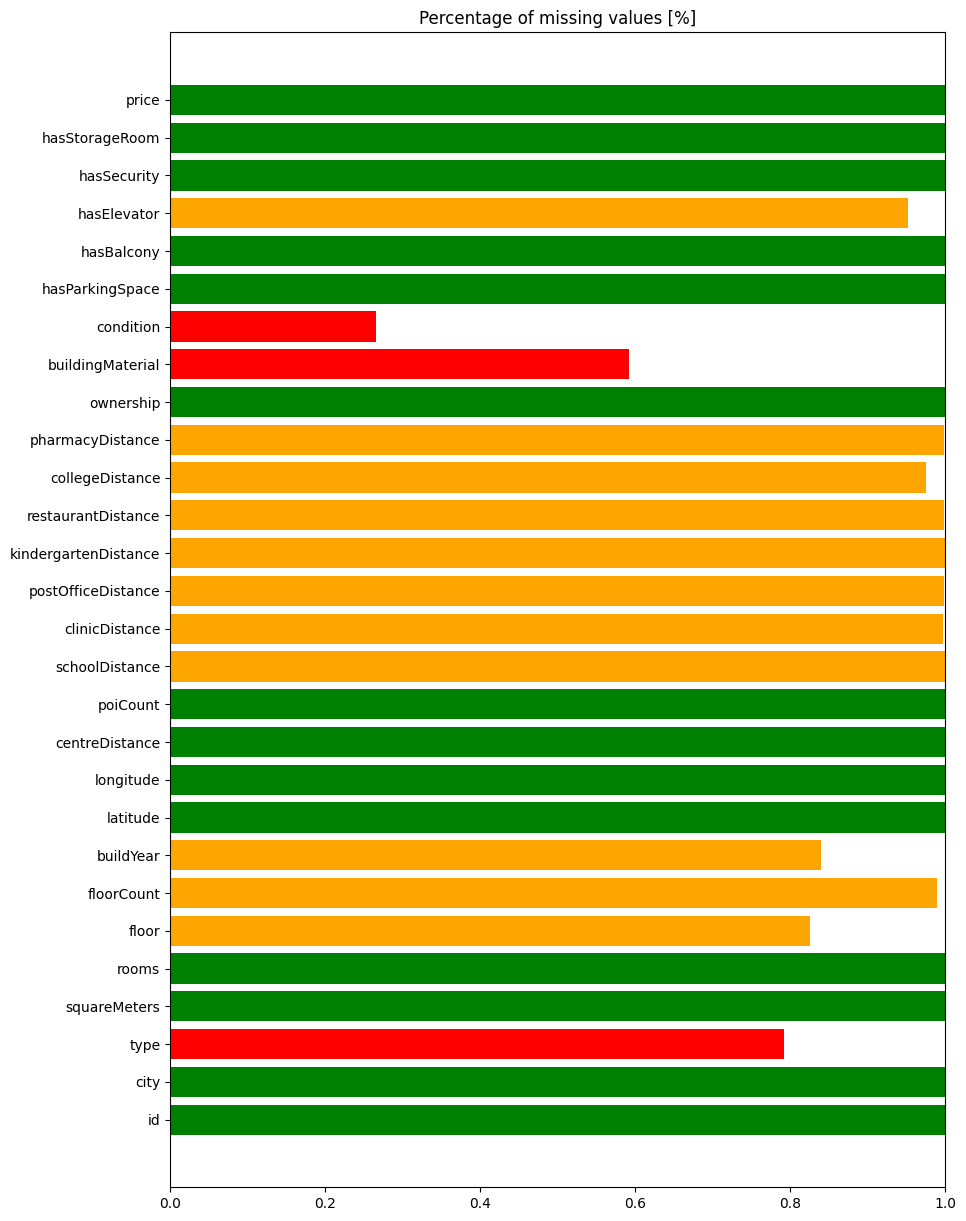

In [22]:
import matplotlib.pyplot as plt

tmp = []
colors = []

for column in df.columns:
  dataCompleteness = (1 - len(df[df[column].isnull()]) / len(df))
  tmp.append(dataCompleteness)
  if(dataCompleteness == 1):
     colors.append('green')
  elif dataCompleteness < 0.8:
     colors.append('red')
  else:
     colors.append('orange')

fig, axs = plt.subplots(figsize=(10, 15))
axs.set_title("Percentage of missing values [%]")
axs.barh(df.columns, tmp, color=colors)
axs.set_xlim(0, 1)
plt.show()

In [23]:
df.drop(['condition', 'buildingMaterial'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

In [24]:
df

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,312f2788e54076b94f950baaeced3e54,szczecin,blockOfFlats,91.00,4.0,2.0,4.0,1932.0,53.465463,14.593251,...,0.343,1.027,0.182,condominium,no,no,no,no,yes,512000
2,cb5a5f936e4486afd41637860100b033,szczecin,tenement,130.00,4.0,1.0,3.0,1930.0,53.429368,14.552341,...,0.053,0.586,0.114,condominium,no,yes,no,no,yes,975000
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,...,0.071,0.786,0.304,condominium,no,yes,no,no,yes,599000
4,6d947e9a6521b8e608d3fcd6ff2f089a,szczecin,blockOfFlats,80.00,3.0,1.0,2.0,2017.0,53.495272,14.590178,...,0.343,3.706,0.340,condominium,yes,yes,no,yes,no,999999
5,8c06e90fcdf94e7b3b402d0aa0413f55,szczecin,apartmentBuilding,69.50,3.0,3.0,7.0,2017.0,53.457866,14.542014,...,0.378,1.884,0.495,condominium,yes,yes,yes,no,no,777000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249,43ba1ff7e0804730281149d62fc9a48b,bydgoszcz,tenement,95.00,4.0,1.0,3.0,1893.0,53.126000,18.007900,...,0.058,0.622,0.205,condominium,no,no,no,no,yes,599000
19250,157e5a62c7456596685121ebcad1d1fd,bydgoszcz,tenement,87.00,3.0,3.0,3.0,1908.0,53.127340,17.988540,...,0.437,0.386,0.252,condominium,no,no,no,no,yes,509000
19253,c1fa548ec12c2b0e09d6a45b8e0f3789,bydgoszcz,apartmentBuilding,41.21,2.0,1.0,4.0,2020.0,53.130770,17.977059,...,0.550,0.335,0.087,condominium,no,yes,yes,no,yes,439000
19256,bb19da639a2de8bba49be2ca49053c87,bydgoszcz,tenement,108.96,5.0,2.0,4.0,1889.0,53.131748,18.000648,...,0.107,0.226,0.143,condominium,no,no,no,no,yes,795000


In [25]:
numeric_columns = ['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'centreDistance', 'poiCount', 
                   'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 
                   'restaurantDistance', 'collegeDistance', 'pharmacyDistance', 'price']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [26]:
categorical_columns = ['type','city', 'ownership', 'hasParkingSpace', 'hasBalcony', 'hasElevator', 
                       'hasSecurity', 'hasStorageRoom']

df[categorical_columns] = df[categorical_columns].astype(str)

In [27]:
print(df.dtypes)

id                       object
city                     object
type                     object
squareMeters            float64
rooms                   float64
floor                   float64
floorCount              float64
buildYear               float64
latitude                float64
longitude               float64
centreDistance          float64
poiCount                float64
schoolDistance          float64
clinicDistance          float64
postOfficeDistance      float64
kindergartenDistance    float64
restaurantDistance      float64
collegeDistance         float64
pharmacyDistance        float64
ownership                object
hasParkingSpace          object
hasBalcony               object
hasElevator              object
hasSecurity              object
hasStorageRoom           object
price                     int64
dtype: object


In [28]:
df.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,10489.000000,1.048900e+04
mean,58.454800,2.667080,3.432453,5.775193,1986.568214,51.955067,19.538243,4.309587,21.562589,0.376844,0.894457,0.478368,0.318600,0.298208,1.427371,0.313465,8.659949e+05
std,21.257769,0.907709,2.595366,3.454012,33.181972,1.283265,1.780837,2.735349,24.167187,0.355295,0.800673,0.391881,0.314318,0.332536,1.097111,0.323017,4.453961e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.986041,14.475386,0.020000,0.000000,0.005000,0.004000,0.006000,0.001000,0.001000,0.016000,0.001000,1.900000e+05
25%,44.050000,2.000000,2.000000,4.000000,1969.000000,51.107436,18.542760,2.030000,8.000000,0.173000,0.339000,0.236000,0.149000,0.105000,0.563000,0.140000,5.900000e+05
50%,54.300000,3.000000,3.000000,4.000000,1993.000000,52.192537,19.940724,4.040000,15.000000,0.284000,0.640000,0.385000,0.245000,0.212000,1.100000,0.231000,7.550000e+05
75%,67.900000,3.000000,4.000000,7.000000,2016.000000,52.310310,20.995179,6.050000,26.000000,0.451000,1.142000,0.586000,0.392000,0.378000,2.068000,0.385000,9.990000e+05
max,150.000000,6.000000,29.000000,29.000000,2024.000000,54.571190,23.198950,16.540000,210.000000,4.107000,4.913000,3.978000,4.004000,4.190000,4.995000,4.193000,3.149000e+06


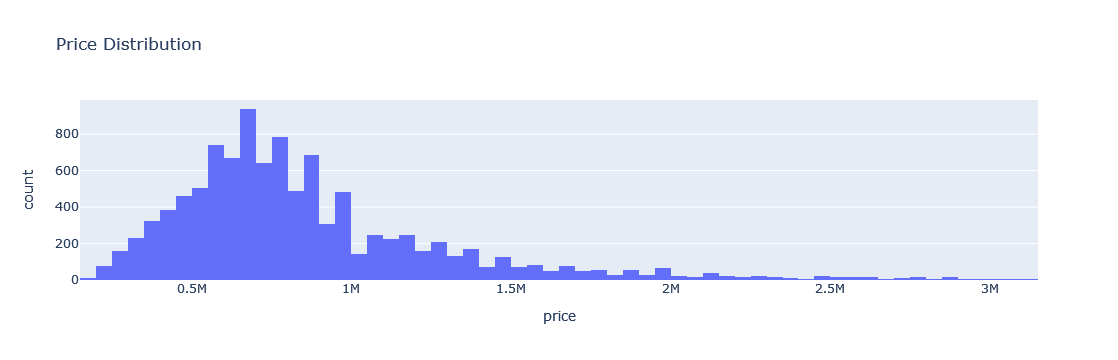

In [29]:
import plotly.express as px

fig = px.histogram(df, x='price', title='Price Distribution')
fig.show()

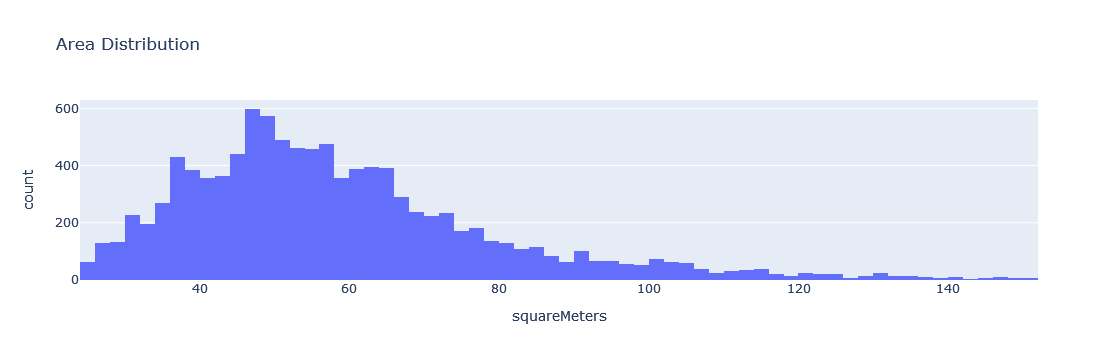

In [30]:
fig = px.histogram(df, x='squareMeters', title='Area Distribution')
fig.show()

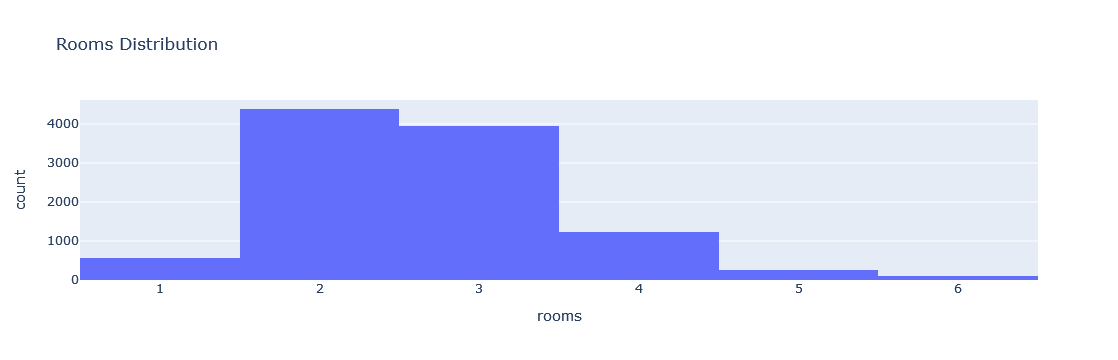

In [31]:
fig = px.histogram(df, x='rooms', title='Rooms Distribution')
fig.show()